<div style="text-align: center;">
    <h1>eCommerce Customer Churn</h1>
</div>

## 1. Prepare Problem

### Load libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Read the dataset into a pandas DataFrame

In [40]:
# path
file_path = 'Data\E Commerce Dataset.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

## 2. Exploratory Data Analysis

### 2.1. Descriptive statistics

In [41]:
# Display the first few rows of the DataFrame to check if the data was read correctly
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [42]:
# Overview of the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [43]:
# Summary statistics for numerical columns
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


### 2.2. Data Visualization: Explore Relationships

We first visulize correlation heatmap

#### Correlation heatmap

C:\Users\nbho\AppData\Local\Temp\ipykernel_3556\1521501704.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


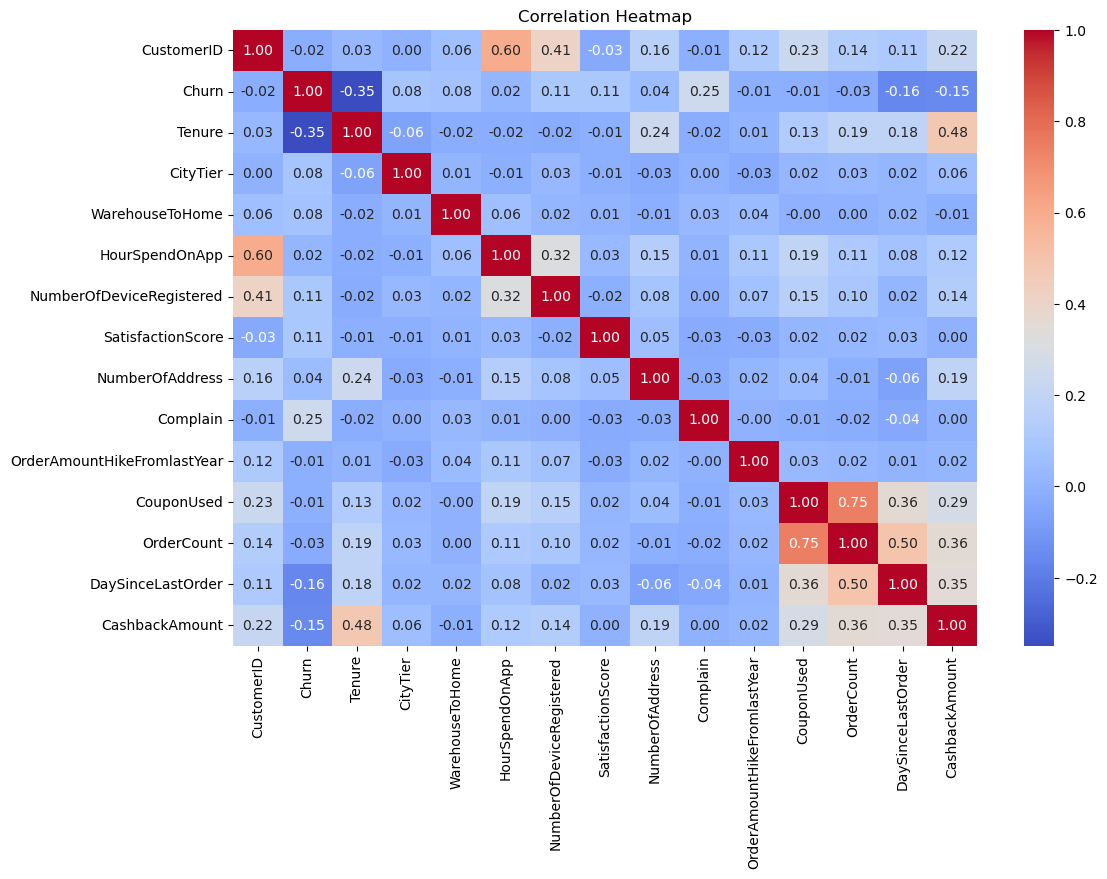

In [44]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

There is no strong correlation between churn and another attribute. 

We now explore relationship between each attribute with churn rate. We explore folling questions: 
1. What is the overall churn rate for the e-commerce business?
2. How does the churn rate vary by customer demographic factors such as gender, marital status, and city tier?
3. Is there a relationship between customer tenure and churn? Do long-tenured customers have lower churn rates?
4. Which preferred login device has the highest churn rate? Is there a correlation between preferred login devices and customer churn?
5. Does the distance between the warehouse and the customer's home affect the churn rate? Are customers who live farther away more likely to churn?
6. What is the distribution of preferred payment modes among churned customers? Do certain payment methods have a higher churn rate?
7. Is there a correlation between the number of hours spent on the mobile application or website and the churn rate? Do customers who spend more time have lower churn rates?
8. Does the preferred order category impact the churn rate? Are customers who frequently order from a specific category more likely to churn?
9. Is there a relationship between customer satisfaction score and churn rate? Do dissatisfied customers have a higher likelihood of churning?
10. Are customers who raised complaints in the last month more likely to churn? Is there a relationship between complaints and churn rate?
11. Is there a correlation between the percentage increase in order amount from last year and churn rate? Do customers who experienced a higher increase in order amount have a lower churn rate?
12. Does the number of coupons used impact the churn rate? Are customers who use more coupons less likely to churn?
13. Does the average cashback amount influence the churn rate? Are customers who receive higher cashback amounts less likely to churn?

#### **Question 1:** What is the overall churn rate for the e-commerce business?

0    4682
1     948
Name: Churn, dtype: int64


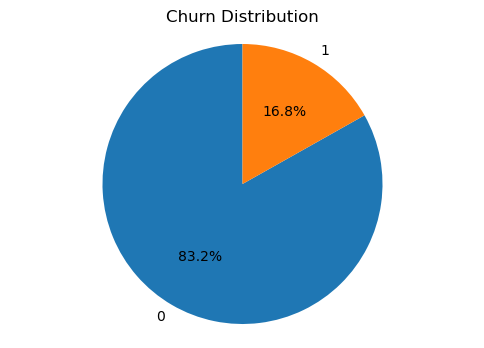

In [45]:
# count churn and stay
churn_counts = df['Churn'].value_counts()
print(churn_counts)
plt.figure(figsize=(6, 4))
# label by index
# choose 1 decimal place for percentage
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  
plt.show()

The churn rate is almost 17%.

#### **Question 2:** How does the churn rate vary by customer demographic factors such as gender, marital status, and city tier?

Data shows 
- Male has higher churn rate
- Single tend to churn more than other two groups
- Churn rate increases proportionally with City Tier

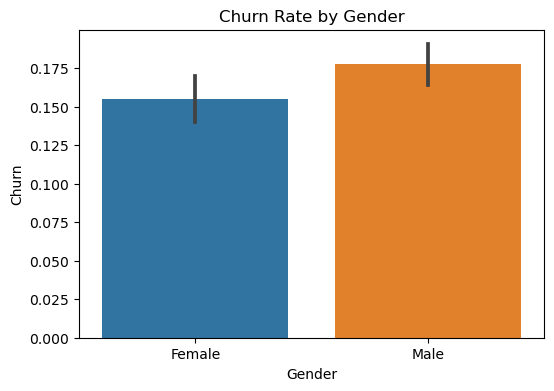

In [46]:
# Churn rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.show()

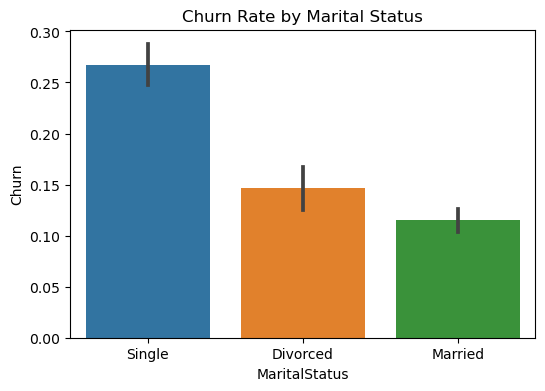

In [47]:
# Churn rate by Marital Status
plt.figure(figsize=(6, 4))
sns.barplot(x='MaritalStatus', y='Churn', data=df)
plt.title('Churn Rate by Marital Status')
plt.show()

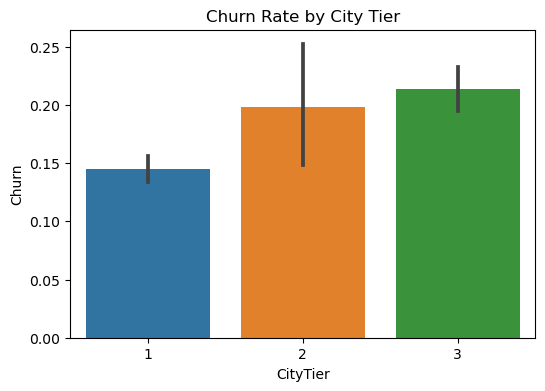

In [48]:
# Churn rate by City Tier
plt.figure(figsize=(6, 4))
sns.barplot(x='CityTier', y='Churn', data=df)
plt.title('Churn Rate by City Tier')
plt.show()

#### **Question 3:** Is there a relationship between customer tenure and churn? Do long-tenured customers have lower churn rates?

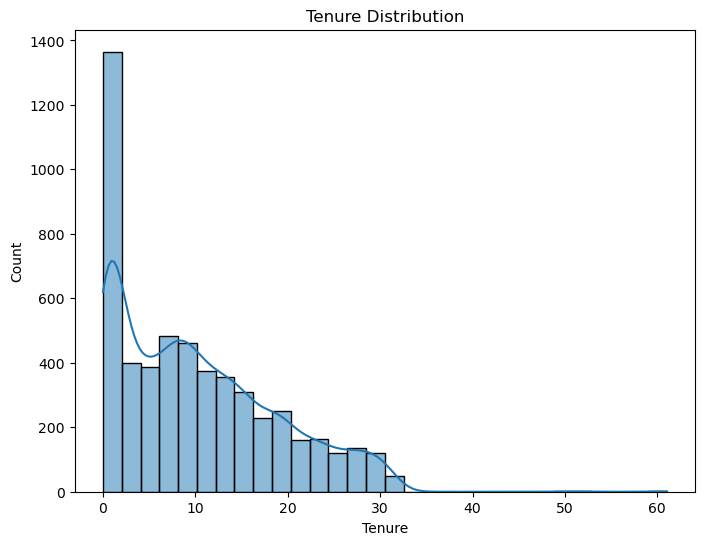

In [49]:
# Plot Tenure distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Tenure', bins=30, kde=True)
plt.title('Tenure Distribution')
plt.show()

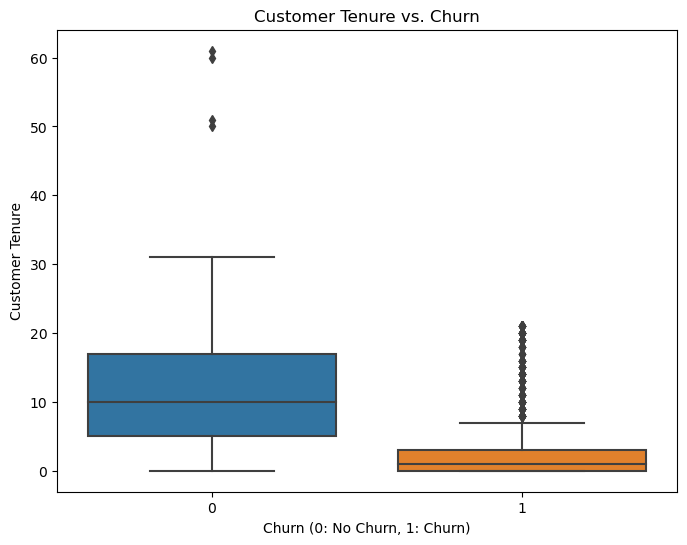

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Customer Tenure')
plt.show()

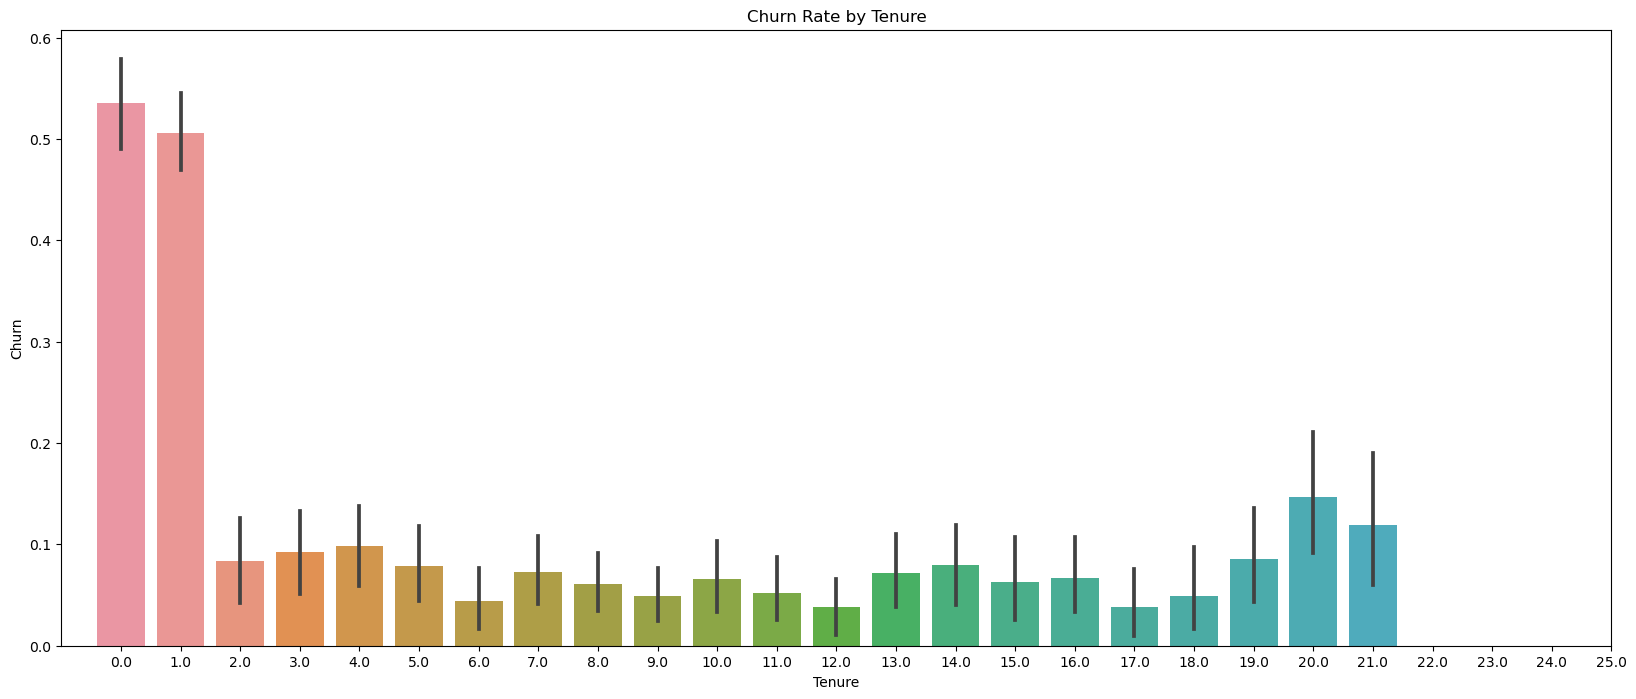

In [51]:
# Churn rate by Tenure
plt.figure(figsize=(20, 8))
sns.barplot(x='Tenure', y='Churn', data=df)
plt.title('Churn Rate by Tenure')
plt.xlim(-1, 25)  
plt.show()

### **Question 4:** Which preferred login device has the highest churn rate? Is there a correlation between preferred login devices and customer churn?

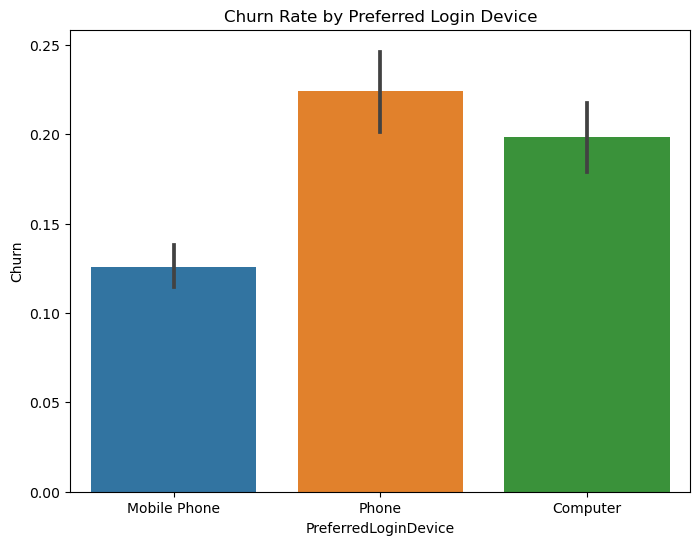

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferredLoginDevice', y='Churn', data=df)
plt.title('Churn Rate by Preferred Login Device')
plt.show()

### Question 4: Does the distance between the warehouse and the customer's home affect the churn rate? Are customers who live farther away more likely to churn?

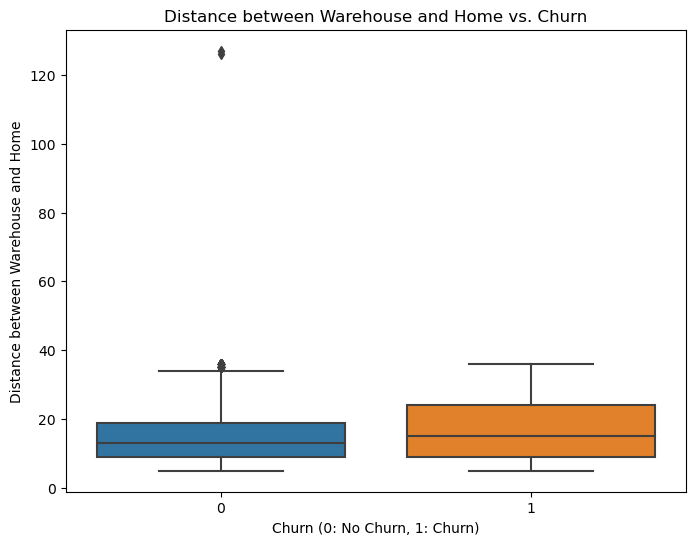

In [53]:
# Distance between Warehouse and Home vs. Churn: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='WarehouseToHome', data=df)
plt.title('Distance between Warehouse and Home vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Distance between Warehouse and Home')
plt.show()

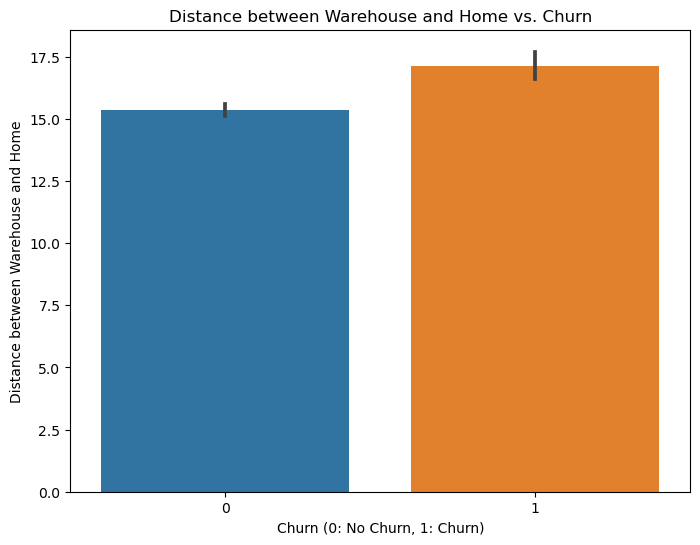

In [54]:
# Distance between Warehouse and Home vs. Churn: Box plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='WarehouseToHome', data=df)
plt.title('Distance between Warehouse and Home vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Distance between Warehouse and Home')
plt.show()

### Question 5: What is the distribution of preferred payment modes among churned customers? Do certain payment methods have a higher churn rate?

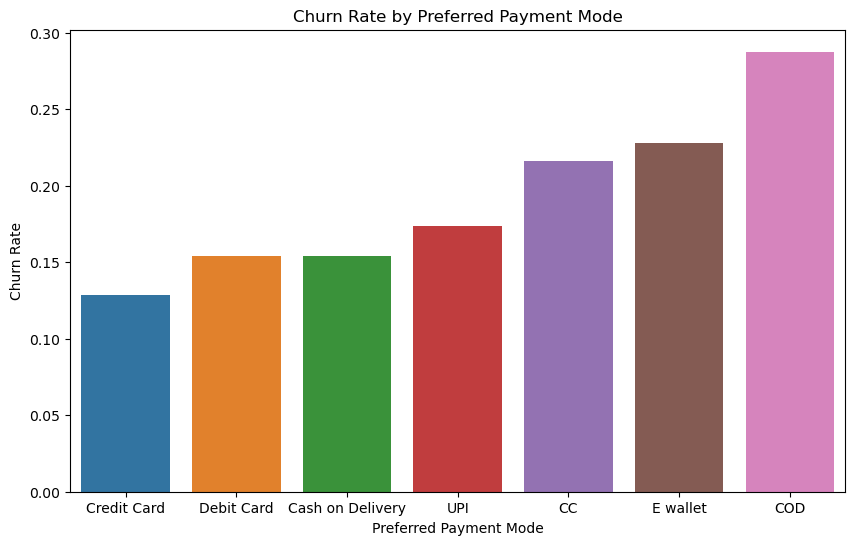

In [55]:
# Calculate churn rates for each preferred payment mode
churn_rate_by_payment_mode = df.groupby('PreferredPaymentMode')['Churn'].mean().reset_index()

# Sort the data in increasing order of churn rate
churn_rate_by_payment_mode = churn_rate_by_payment_mode.sort_values(by='Churn')

# Bar plot: Churn Rate by Preferred Payment Mode (sorted in increasing order)
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredPaymentMode', y='Churn', data=churn_rate_by_payment_mode)
plt.title('Churn Rate by Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Churn Rate')
plt.show()

### Question 6: Is there a correlation between the number of hours spent on the mobile application or website and the churn rate? Do customers who spend more time have lower churn rates?

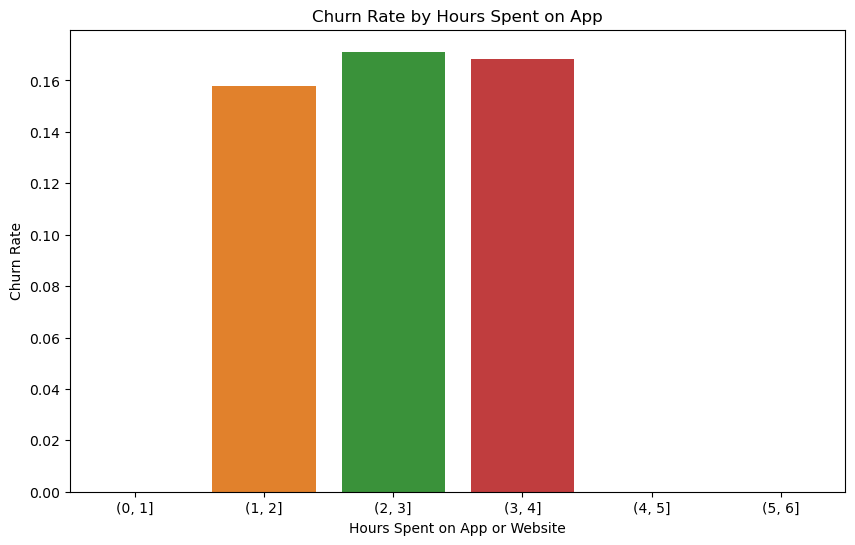

In [56]:
# Hours spent on App vs. Churn: Bar chart
# Group the data into bins based on hours spent on the app
bins = [0, 1, 2, 3, 4, 5, 6]
df['HoursBins'] = pd.cut(df['HourSpendOnApp'], bins=bins)

# Calculate churn rates for each bin
churn_rate_by_hours = df.groupby('HoursBins')['Churn'].mean().reset_index()

# Bar plot: Hours Spent on App vs. Churn
plt.figure(figsize=(10, 6))
sns.barplot(x='HoursBins', y='Churn', data=churn_rate_by_hours)
plt.title('Churn Rate by Hours Spent on App')
plt.xlabel('Hours Spent on App or Website')
plt.ylabel('Churn Rate')
plt.show()

### Question 7: Does the preferred order category impact the churn rate? Are customers who frequently order from a specific category more likely to churn?

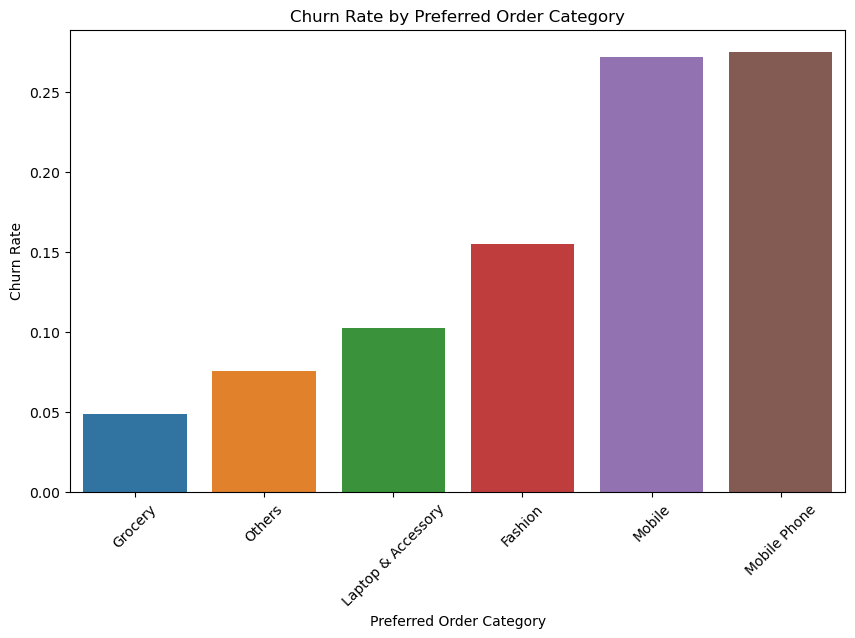

In [57]:
# Preferred Order Category vs. Churn: Bar chart
# Calculate churn rates for each preferred order category
churn_rate_by_order_category = df.groupby('PreferedOrderCat')['Churn'].mean().reset_index()

# Sort the data in increasing order of churn rate
churn_rate_by_order_category = churn_rate_by_order_category.sort_values(by='Churn')

# Bar plot: Churn Rate by Preferred Order Category (sorted in increasing order)
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferedOrderCat', y='Churn', data=churn_rate_by_order_category)
plt.title('Churn Rate by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

### Question 8: Is there a relationship between customer satisfaction score and churn rate? Do dissatisfied customers have a higher likelihood of churning?

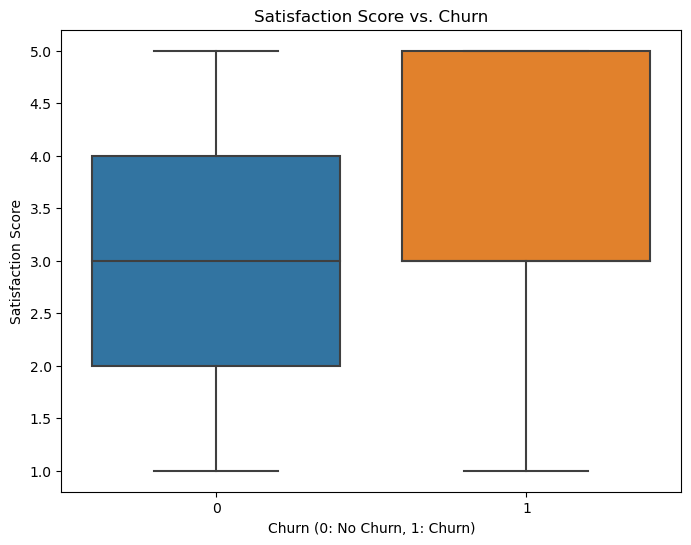

In [58]:
# Satisfaction Score vs. Churn: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('Satisfaction Score vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Satisfaction Score')
plt.show()

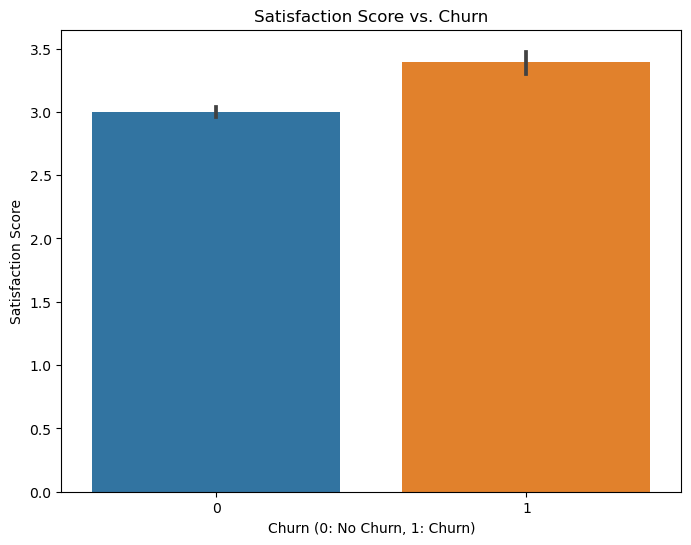

In [59]:
# Satisfaction Score vs. Churn: Barplot with ci
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='SatisfactionScore', data=df)
plt.title('Satisfaction Score vs. Churn')
plt.xlabel('Churn (0: No Churn, 1: Churn)')
plt.ylabel('Satisfaction Score')
plt.show()

### Question 9: Are customers who raised complaints in the last month more likely to churn? Is there a relationship between complaints and churn rate? 

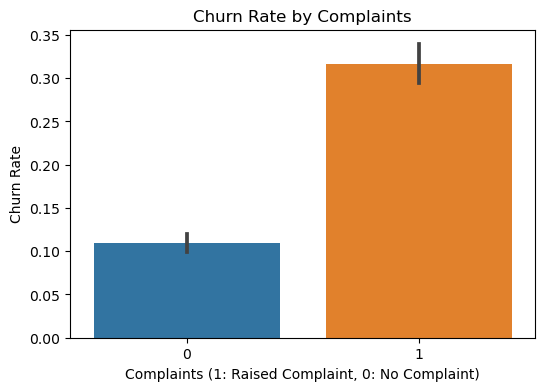

In [60]:
# Complaints vs. Churn: barplot with ci
plt.figure(figsize=(6, 4))
sns.barplot(x='Complain', y='Churn', data=df)
plt.title('Churn Rate by Complaints')
plt.xlabel('Complaints (1: Raised Complaint, 0: No Complaint)')
plt.ylabel('Churn Rate')
plt.show()

### Question 10: Is there a correlation between the percentage increase in order amount from last year and churn rate? Do customers who experienced a higher increase in order amount have a lower churn rate?

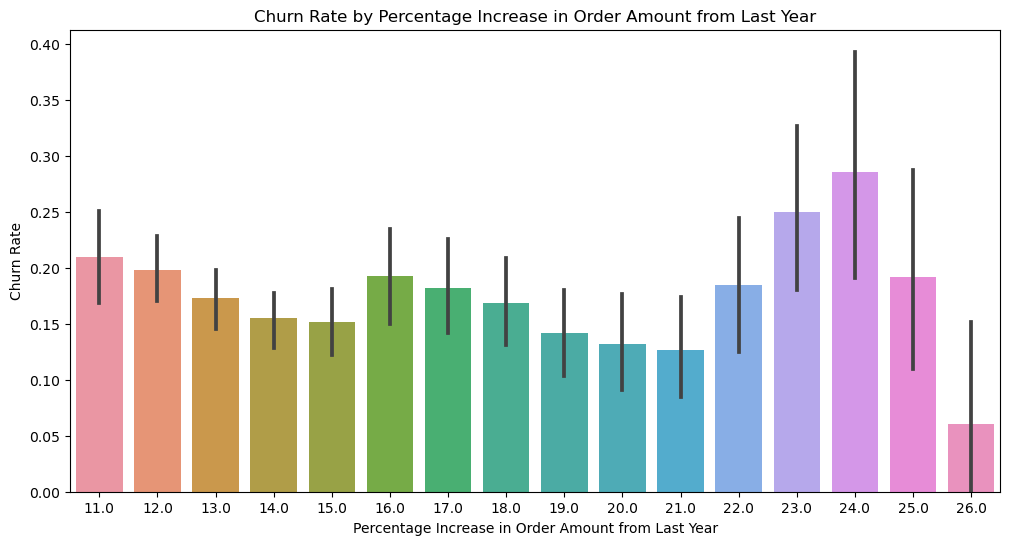

In [61]:
# Order Amount Hike vs. Churn: barplot with ci
plt.figure(figsize=(12, 6))
sns.barplot(x='OrderAmountHikeFromlastYear', y='Churn', data=df)
plt.title('Churn Rate by Percentage Increase in Order Amount from Last Year')
plt.xlabel('Percentage Increase in Order Amount from Last Year')
plt.ylabel('Churn Rate')
plt.show()

### Question 11: Does the number of coupons used impact the churn rate? Are customers who use more coupons less likely to churn?

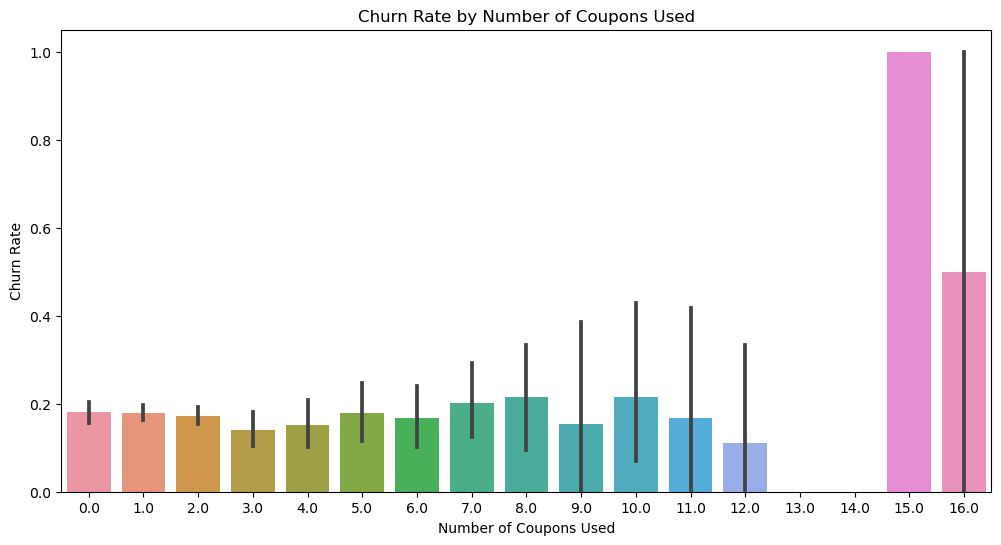

In [62]:
# Number of Soupons vs. Churn: barplot with ci
plt.figure(figsize=(12, 6))
sns.barplot(x='CouponUsed', y='Churn', data=df)
plt.title('Churn Rate by Number of Coupons Used')
plt.xlabel('Number of Coupons Used')
plt.ylabel('Churn Rate')
plt.show()

The data with those spent 15 or more scoupons is unusual. We count how many.

In [65]:
df[df['CouponUsed']> 14].shape[0]

3

In [66]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,HoursBins
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,"(2.0, 3.0]"
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,"(2.0, 3.0]"
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,"(1.0, 2.0]"
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,"(1.0, 2.0]"
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,151,"(2.0, 3.0]"
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,5,Married,6,0,16.0,1.0,2.0,NaN,225,"(2.0, 3.0]"
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186,"(2.0, 3.0]"
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,179,"(3.0, 4.0]"


### Question 12: Does the average cashback amount influence the churn rate? Are customers who receive higher cashback amounts less likely to churn?

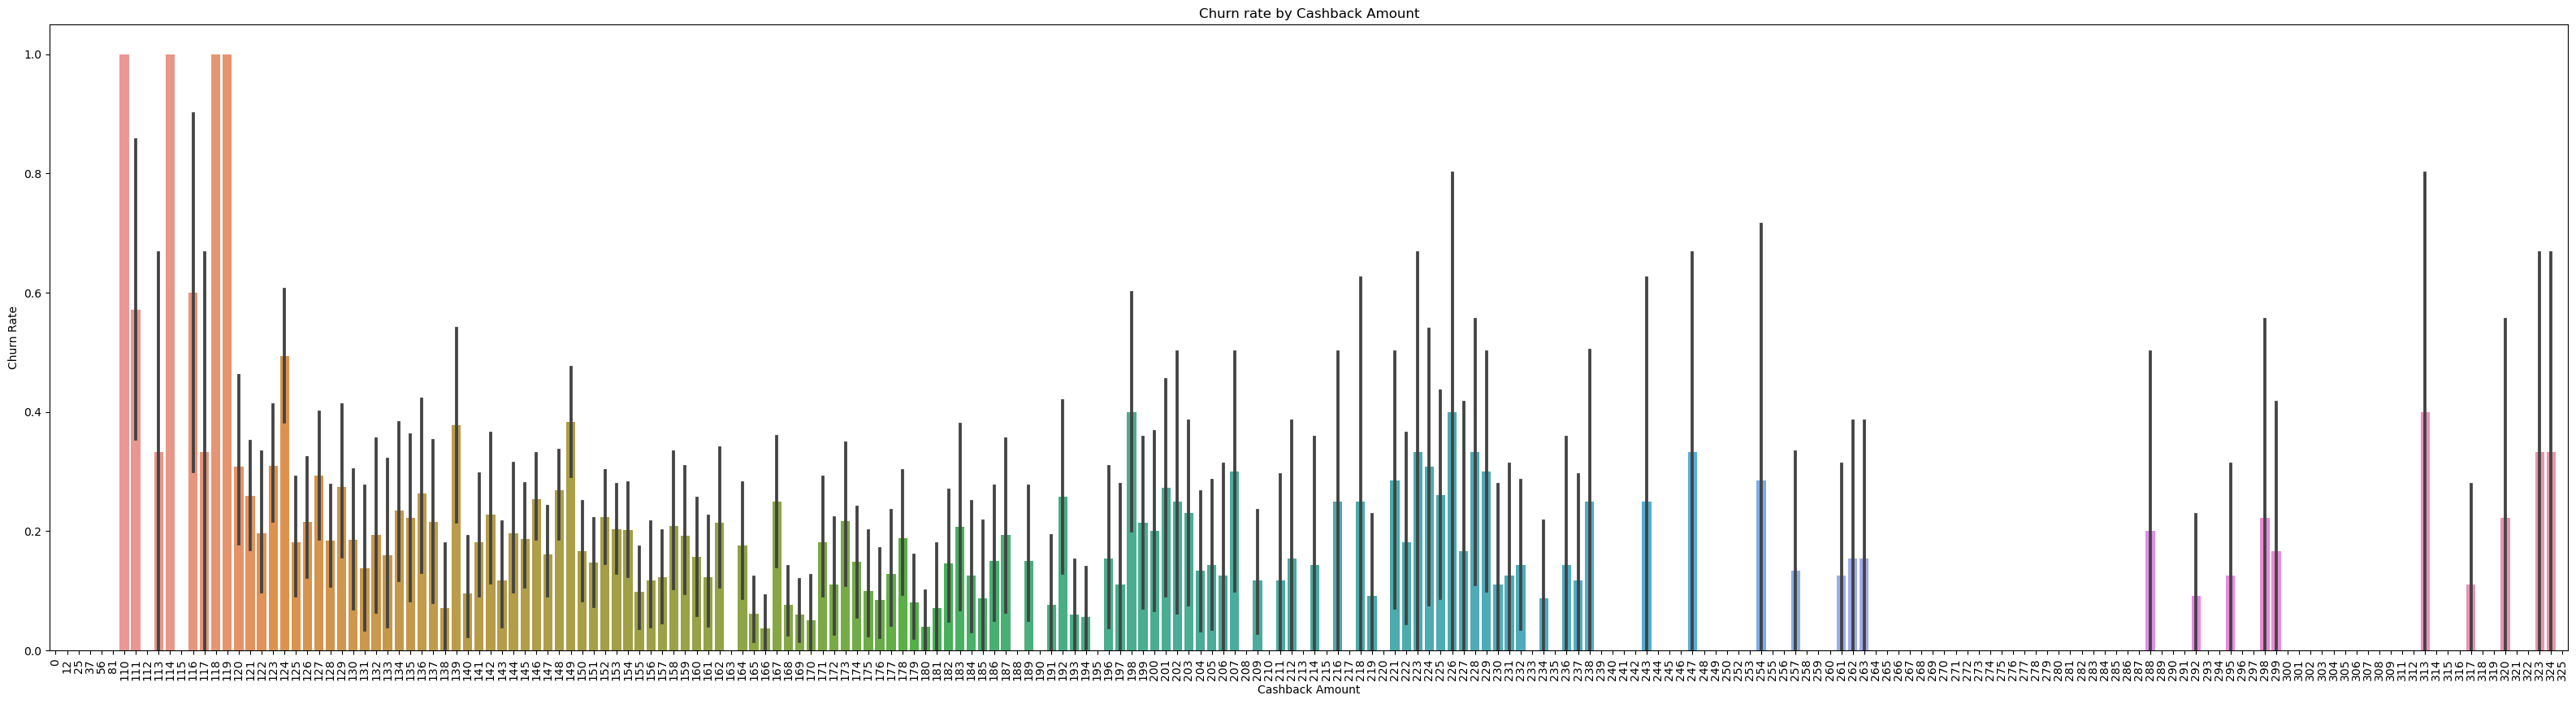

In [67]:
# Cashback vs. Churn: barplot with ci
plt.figure(figsize=(40, 10))
sns.barplot(x='CashbackAmount', y='Churn', data=df)
plt.title('Churn rate by Cashback Amount')
plt.xlabel('Cashback Amount')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()

## 3. Prepare Data

In [68]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,HoursBins
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,"(2.0, 3.0]"
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,"(2.0, 3.0]"
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,"(1.0, 2.0]"
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,"(1.0, 2.0]"
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,...,1,Married,6,0,18.0,1.0,2.0,4.0,151,"(2.0, 3.0]"
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,...,5,Married,6,0,16.0,1.0,2.0,NaN,225,"(2.0, 3.0]"
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,...,4,Married,3,1,21.0,1.0,2.0,4.0,186,"(2.0, 3.0]"
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,...,4,Married,4,0,15.0,2.0,2.0,9.0,179,"(3.0, 4.0]"


### 3.1. Drop Column

We remove column "CustomerID".

In [69]:
# df.drop(['CustomerID','HoursBins'], axis=1, inplace=True)
df_drop = df.drop(['CustomerID','HoursBins'], axis=1)

### 3.2. Handle Missing Values

We count missing values

In [70]:
df_drop.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

We replace missing values with mean.

In [71]:
col_means = df_drop.mean()
col_filled = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
df_drop[col_filled] = df_drop[col_filled].fillna(col_means)

C:\Users\nbho\AppData\Local\Temp\ipykernel_3556\1935719579.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_means = df_drop.mean()


Let's check

In [72]:
df_drop.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 3.3. Handle Outlier 

We remove some outliers. There are three entries with CouponUsed > 14. We remove these.

In [74]:
df_drop_remove = df_drop[df_drop['CouponUsed'] <= 14]
df_drop_remove.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


### 3.4. Address Inconsistent Data 

We now verify Data Consistency for string categorical variables: `PreferredLoginDevice`, `PreferredPaymentMode`, `Gender`, `PreferedOrderCat`, `MaritalStatus`.

In [76]:
category_lst = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for cat in category_lst:
    print(cat)
    print(df_drop_remove[cat].value_counts())
    print()

PreferredLoginDevice
Mobile Phone    2763
Computer        1634
Phone           1230
Name: PreferredLoginDevice, dtype: int64

PreferredPaymentMode
Debit Card          2311
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Gender
Male      3383
Female    2244
Name: Gender, dtype: int64

PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1270
Fashion                826
Mobile                 808
Grocery                409
Others                 264
Name: PreferedOrderCat, dtype: int64

MaritalStatus
Married     2985
Single      1794
Divorced     848
Name: MaritalStatus, dtype: int64



There is duplicate in `PreferredLoginDevice` where `Mobile Phone` and `Phone` are two different types. They should be the same. 
We merge into one and using name `Phone`

In [77]:
df_drop_remove['PreferredLoginDevice'] = df_drop_remove['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')

Let's verify result

In [81]:
df_drop_remove['PreferredLoginDevice'].value_counts()


Phone       3993
Computer    1634
Name: PreferredLoginDevice, dtype: int64

### 3.5. Data Normalization

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
df_drop_remove

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.000000,160
1,1,10.189899,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.000000,121
2,1,10.189899,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.000000,120
3,1,0.000000,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.000000,134
4,1,0.000000,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.000000,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.000000,Computer,1,30.0,Credit Card,Male,3.000000,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.000000,151
5626,0,13.000000,Phone,1,13.0,Credit Card,Male,3.000000,5,Fashion,5,Married,6,0,16.0,1.0,2.0,4.543491,225
5627,0,1.000000,Phone,1,11.0,Debit Card,Male,3.000000,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.000000,186
5628,0,23.000000,Computer,3,9.0,Credit Card,Male,4.000000,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.000000,179


In [82]:
df_drop_remove.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5627 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5627 non-null   int64  
 1   Tenure                       5627 non-null   float64
 2   PreferredLoginDevice         5627 non-null   object 
 3   CityTier                     5627 non-null   int64  
 4   WarehouseToHome              5627 non-null   float64
 5   PreferredPaymentMode         5627 non-null   object 
 6   Gender                       5627 non-null   object 
 7   HourSpendOnApp               5627 non-null   float64
 8   NumberOfDeviceRegistered     5627 non-null   int64  
 9   PreferedOrderCat             5627 non-null   object 
 10  SatisfactionScore            5627 non-null   int64  
 11  MaritalStatus                5627 non-null   object 
 12  NumberOfAddress              5627 non-null   int64  
 13  Complain          

In [86]:
normalized_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 
'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CashbackAmount']

In [90]:
df_drop_remove[normalized_columns] = scaler.fit_transform(df_drop_remove[normalized_columns])

In [93]:
df_normalized = df_drop_remove
df_normalized

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,-0.741280,Phone,3,-1.155809,Debit Card,Female,0.097078,-0.673927,Laptop & Accessory,2,Single,1.852013,1,-1.311861,1.0,1.0,0.129810,-0.350078
1,1,-0.000119,Phone,1,-0.915861,UPI,Male,0.097078,0.303441,Mobile,3,Single,1.077916,1,-0.197196,0.0,1.0,-1.279141,-1.143215
2,1,-0.000119,Phone,1,1.723564,Debit Card,Male,-1.320339,0.303441,Mobile,3,Single,0.690868,1,-0.475862,0.0,1.0,-0.433770,-1.163551
3,1,-1.220229,Phone,3,-0.076044,Debit Card,Male,-1.320339,0.303441,Laptop & Accessory,5,Single,1.464965,0,2.032136,0.0,1.0,-0.433770,-0.878836
4,1,-1.220229,Phone,1,-0.435966,CC,Male,0.000034,-0.673927,Mobile,5,Single,-0.470277,0,-1.311861,1.0,1.0,-0.433770,-0.960183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,-0.022857,Computer,1,1.723564,Credit Card,Male,0.097078,-1.651295,Laptop & Accessory,1,Married,0.690868,0,0.638804,1.0,2.0,-0.151980,-0.533109
5626,0,0.336355,Phone,1,-0.315992,Credit Card,Male,0.097078,1.280809,Fashion,5,Married,0.690868,0,0.081471,1.0,2.0,0.001170,0.971817
5627,0,-1.100492,Phone,1,-0.555940,Debit Card,Male,0.097078,-1.651295,Laptop & Accessory,4,Married,-0.470277,1,1.474803,1.0,2.0,-0.151980,0.178680
5628,0,1.533728,Computer,3,-0.795887,Credit Card,Male,1.514496,1.280809,Laptop & Accessory,4,Married,-0.083229,0,-0.197196,2.0,2.0,1.256971,0.036322


## 4. Evaluate Algorithms
### 4.1 Split-out validation dataset
### 4.1 Test options and evaluation metric
### 4.1 Spot Check Algorithms
### 4.1 Compare Algorithms

## 5. Improve Accuracy
### 5.1 Algorithm Tuning
### 5.1 Ensembles


## 6 - Finalize Model